# 1. Pandas能处理什么样的数据
1. 数据表成为DataFrame   
2. 对数据科学家来说：竖着的列column通常放变量，横着的行row通常放观察observation

### 框框框
1. pd.DataFrame的主流参数是字典
2. 最后一个逗号可有可无，但最好有逗号比较好
3. dataframe 二维的表格型数据结构   
   series 一维数组

In [136]:
import pandas as pd

In [137]:
框 = pd.DataFrame({
    "变数A":["观察A1","观察A2","观察A3"],
    "变数B":["观察B1","观察B2","观察B3"],
    "变数C":["观察C1","观察C2","观察C3"],
})
框

,变数A,变数B,变数C
0,观察A1,观察B1,观察C1
1,观察A2,观察B2,观察C2
2,观察A3,观察B3,观察C3


In [138]:
# 又或者可以这样
dict = {
    "变数A":["观察A1","观察A2","观察A3"],
    "变数B":["观察B1","观察B2","观察B3"],
    "变数C":["观察C1","观察C2","观察C3"],
}
框 = pd.DataFrame(dict)
框

,变数A,变数B,变数C
0,观察A1,观察B1,观察C1
1,观察A2,观察B2,观察C2
2,观察A3,观察B3,观察C3


In [139]:
# 在ipynb中一般不使用print打印表格，因为输出是文字输出
# 又或者可以这样
from IPython.display import display,HTML
display(框)

,变数A,变数B,变数C
0,观察A1,观察B1,观察C1
1,观察A2,观察B2,观察C2
2,观察A3,观察B3,观察C3


### 取变数成系列(series)

In [140]:
# 类似于字典取值
框["变数A"]

0    观察A1
1    观察A2
2    观察A3
Name: 变数A, dtype: object

In [141]:
框["变数A"].values

array(['观察A1', '观察A2', '观察A3'], dtype=object)

In [142]:
# index是索引
框["变数A"].index

RangeIndex(start=0, stop=3, step=1)

In [143]:
list(框["变数A"].index)

[0, 1, 2]

In [144]:
# 用 .loc[] 取列, 相当於所有变数的某一次观察
框.loc[2]

变数A    观察A3
变数B    观察B3
变数C    观察C3
Name: 2, dtype: object

In [145]:
# 将series变列表 to_list()
# 3种方法
print(框["变数A"].to_list())
print ( list(框 ["变数A"]) )
print ( list(框 ["变数A"].values) )

# 还可以打印索引
print ( list(框 ["变数A"].index) )

['观察A1', '观察A2', '观察A3']
['观察A1', '观察A2', '观察A3']
['观察A1', '观察A2', '观察A3']
[0, 1, 2]


# 2. 如何读写数据
## 读读读

```
读写到csv = pd.read_csv("路径文档名"，encoding="utf8")
读写到tsv = pd.read_tsv("路径文档名"，encoding="utf8")
读写到excel = pd.read_excel("路径文档名"，encoding="utf8")
```

**尽量用tsv,不要用csv**

In [146]:
df = pd.read_csv("20春_pandas_week02_hurun_unicorn_more.csv", encoding="utf8", sep="\t")
df.head()
# head只取前5个

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构,region
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本,环杭州湾大湾区
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投,渤海大湾区
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本,渤海大湾区
3,6,陆金所,Lufax,2700,中国,上海,金融科技,计葵生,2011,摩根士丹利、中银集团、国泰君安（香港）,环杭州湾大湾区
4,11,微众银行,WeBank,1500,中国,深圳,金融科技,顾敏,2014,腾讯、华平投资、淡马锡,粤港澳大湾区


In [147]:
df = pd.read_csv("20春_pandas_week02_hurun_unicorn.tsv", encoding="utf8",sep="\t")
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [148]:
df = pd.read_excel("20春_pandas_week02_hurun_unicorn.xlsx", encoding="utf8", sheet_name="独角兽")
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [149]:
df = pd.read_excel("20春_pandas_week02_hurun_unicorn.xlsx", encoding="utf8", sheet_name="独角兽")
df.info() # 索引，说明数据类型和内存信息
df.shape  # 输出行数和列数
df.describe(include="all") # 数值列的汇总统计信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
count,494.000000,494,494,494.000000,494,494,494,494,494.000000,494
unique,NaN,494,494,NaN,24,120,25,485,NaN,489
top,NaN,柠萌影业,TripActions,NaN,中国,北京,电子商务,张勇,NaN,未透露
freq,NaN,1,1,NaN,206,81,68,3,NaN,3
mean,180.977733,NaN,NaN,238.805668,NaN,NaN,NaN,NaN,2011.234818,NaN
std,91.073191,NaN,NaN,623.158537,NaN,NaN,NaN,NaN,3.792477,NaN
min,1.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,2000.000000,NaN
25%,84.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,2009.000000,NaN
50%,224.000000,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,2012.000000,NaN
75%,264.000000,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,2014.000000,NaN


In [150]:
df = pd.read_excel("20春_pandas_week02_hurun_unicorn.xlsx", encoding="utf8", sheet_name="独角兽")
df.to_html() # 写入到html文件
# df.to_markdown()  转换为markdown格式

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>排名</th>\n      <th>企业名称</th>\n      <th>Company Name</th>\n      <th>估值（亿人民币）</th>\n      <th>国家</th>\n      <th>城市</th>\n      <th>行业</th>\n      <th>掌门人/创始人</th>\n      <th>成立年份</th>\n      <th>部分投资机构</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>蚂蚁金服</td>\n      <td>Ant Financial</td>\n      <td>10000</td>\n      <td>中国</td>\n      <td>杭州</td>\n      <td>金融科技</td>\n      <td>井贤栋</td>\n      <td>2014</td>\n      <td>春华资本、中投海外、红杉资本</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>字节跳动</td>\n      <td>Bytedance</td>\n      <td>5000</td>\n      <td>中国</td>\n      <td>北京</td>\n      <td>媒体和娱乐</td>\n      <td>张一鸣</td>\n      <td>2012</td>\n      <td>红杉资本、海纳亚洲、纪源资本、启明创投</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>滴滴出行</td>\n      <td>Didi Chuxing</td>\n      <td>3600</td>\n   

In [151]:
df.to_json() #  写入到 json 文件

'{"\\u6392\\u540d":{"0":1,"1":2,"2":3,"3":4,"4":5,"5":6,"6":6,"7":8,"8":9,"9":10,"10":11,"11":12,"12":12,"13":14,"14":15,"15":15,"16":15,"17":15,"18":19,"19":20,"20":20,"21":20,"22":23,"23":23,"24":25,"25":25,"26":25,"27":25,"28":25,"29":30,"30":30,"31":30,"32":30,"33":34,"34":34,"35":34,"36":34,"37":34,"38":34,"39":34,"40":34,"41":34,"42":43,"43":43,"44":43,"45":43,"46":43,"47":43,"48":43,"49":50,"50":50,"51":50,"52":50,"53":50,"54":50,"55":50,"56":57,"57":57,"58":57,"59":57,"60":57,"61":57,"62":57,"63":57,"64":57,"65":57,"66":57,"67":57,"68":57,"69":57,"70":57,"71":57,"72":57,"73":57,"74":57,"75":57,"76":57,"77":57,"78":57,"79":57,"80":57,"81":57,"82":83,"83":84,"84":84,"85":84,"86":84,"87":84,"88":84,"89":84,"90":84,"91":84,"92":84,"93":84,"94":84,"95":84,"96":84,"97":84,"98":84,"99":84,"100":84,"101":84,"102":84,"103":84,"104":84,"105":84,"106":84,"107":84,"108":84,"109":84,"110":84,"111":84,"112":84,"113":84,"114":84,"115":84,"116":84,"117":84,"118":84,"119":84,"120":84,"121":84,"

In [152]:
df.describe().to_dict()
# 转换为字典

{'排名': {'count': 494.0,
  'mean': 180.97773279352228,
  'std': 91.07319075981641,
  'min': 1.0,
  '25%': 84.0,
  '50%': 224.0,
  '75%': 264.0,
  'max': 264.0},
 '估值（亿人民币）': {'count': 494.0,
  'mean': 238.80566801619435,
  'std': 623.1585372633193,
  'min': 70.0,
  '25%': 70.0,
  '50%': 100.0,
  '75%': 200.0,
  'max': 10000.0},
 '成立年份': {'count': 494.0,
  'mean': 2011.2348178137652,
  'std': 3.7924771092178786,
  'min': 2000.0,
  '25%': 2009.0,
  '50%': 2012.0,
  '75%': 2014.0,
  'max': 2019.0}}

In [153]:
# df.to_dict() 转换为字典
data = pd.DataFrame({
    "A":["A1","A2"],
    "B":["B1","B2"],
})
data.to_dict()

{'A': {0: 'A1', 1: 'A2'}, 'B': {0: 'B1', 1: 'B2'}}

In [154]:
data.describe().to_dict()

{'A': {'count': 2, 'unique': 2, 'top': 'A2', 'freq': 1},
 'B': {'count': 2, 'unique': 2, 'top': 'B1', 'freq': 1}}

In [155]:
# df.to_sql(table_name,connection_object) 写入sql表

# 3. 如何选择表格的子集？
## 切切切

**注意标点符号及缩进**
1. 列子集   
   * df.loc[]
   * df.iloc[]
   * df.set_index()
   * df.head(n)
   * df.tail(n)
   * df.nlargest(n,'变量')
   * df.nsmallest(n,'变量')
   * df[df.估值(亿人民币) >10]
2. 行子集
   * df[['变量A','变量B','变量C']]
   * df[['变量A']]
   * df['变量A']
3. 列+行子集
   * df.loc[:,['变量A':'变量C']]
   * df.iloc[:,[1,2,5]]
   * df.loc[df['变量A']>10,['变量A','变量B']]

In [195]:
df.iloc[2]

排名                                   3
企业名称                              滴滴出行
Company Name              Didi Chuxing
估值（亿人民币）                          3600
国家                                  中国
城市                                  北京
行业                                共享经济
掌门人/创始人                             程维
成立年份                              2012
部分投资机构          腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
Name: 2, dtype: object

In [203]:
df.set_index(['企业名称'])
# 将dataframe中的列转化为索引行

,排名,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
企业名称,,,,,,,,,
蚂蚁金服,1,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
字节跳动,2,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
滴滴出行,3,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
Infor,4,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
JUUL Labs,5,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."
爱彼迎,6,Airbnb,2700,美国,旧金山,共享经济,"Brian Chesky, Joe Gebbia, Nathan Blecharczyk",2008,"Tiger Global Management, Founders Fund, Y Comb..."
陆金所,6,Lufax,2700,中国,上海,金融科技,计葵生,2011,摩根士丹利、中银集团、国泰君安（香港）
SpaceX,8,SpaceX,2500,美国,洛杉矶,航天,Elon Musk,2002,"DFJ, Founders Fund, Google, Bank of America, B..."
WeWork,9,WeWork,2100,美国,纽约,共享经济,"Adam Neumann, Miguel McKevley",2010,"Softbank, Hony Capital, Glade Brook Capital, W..."


In [209]:
df.nlargest(8,'估值（亿人民币）')
# nlargest()的优点就是能一次看到最大的几行，而且不需要排序

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."
5,6,爱彼迎,Airbnb,2700,美国,旧金山,共享经济,"Brian Chesky, Joe Gebbia, Nathan Blecharczyk",2008,"Tiger Global Management, Founders Fund, Y Comb..."
6,6,陆金所,Lufax,2700,中国,上海,金融科技,计葵生,2011,摩根士丹利、中银集团、国泰君安（香港）
7,8,SpaceX,SpaceX,2500,美国,洛杉矶,航天,Elon Musk,2002,"DFJ, Founders Fund, Google, Bank of America, B..."


In [215]:
df['企业名称']

0                       蚂蚁金服
1                       字节跳动
2                       滴滴出行
3                      Infor
4                  JUUL Labs
5                        爱彼迎
6                        陆金所
7                     SpaceX
8                     WeWork
9                     Stripe
10                      微众银行
11                      菜鸟网络
12                      京东数科
13                        快手
14                        大疆
15                      Grab
16                      Hulu
17     Palantir Technologies
18                  DoorDash
19                      比特大陆
20                      京东物流
21                   Samumed
22                    GO-JEK
23                     Paytm
24                      贝壳找房
25                       车好多
26                   Coupang
27                    平安医保科技
28                      Wish
29                  Coinbase
               ...          
464                      优刻得
465                    Udaan
466                  Udacity
467           

In [214]:
df[['企业名称']]

,企业名称
0,蚂蚁金服
1,字节跳动
2,滴滴出行
3,Infor
4,JUUL Labs
5,爱彼迎
6,陆金所
7,SpaceX
8,WeWork
9,Stripe


In [216]:
df[['企业名称','国家','行业']]

,企业名称,国家,行业
0,蚂蚁金服,中国,金融科技
1,字节跳动,中国,媒体和娱乐
2,滴滴出行,中国,共享经济
3,Infor,美国,云计算
4,JUUL Labs,美国,消费品
5,爱彼迎,美国,共享经济
6,陆金所,中国,金融科技
7,SpaceX,美国,航天
8,WeWork,美国,共享经济
9,Stripe,美国,金融科技


In [240]:
df.iloc[0:7,[1,5]]

,企业名称,城市
0,蚂蚁金服,杭州
1,字节跳动,北京
2,滴滴出行,北京
3,Infor,纽约
4,JUUL Labs,旧金山
5,爱彼迎,旧金山
6,陆金所,上海


In [236]:
df.loc[:8,:]

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."
5,6,爱彼迎,Airbnb,2700,美国,旧金山,共享经济,"Brian Chesky, Joe Gebbia, Nathan Blecharczyk",2008,"Tiger Global Management, Founders Fund, Y Comb..."
6,6,陆金所,Lufax,2700,中国,上海,金融科技,计葵生,2011,摩根士丹利、中银集团、国泰君安（香港）
7,8,SpaceX,SpaceX,2500,美国,洛杉矶,航天,Elon Musk,2002,"DFJ, Founders Fund, Google, Bank of America, B..."
8,9,WeWork,WeWork,2100,美国,纽约,共享经济,"Adam Neumann, Miguel McKevley",2010,"Softbank, Hony Capital, Glade Brook Capital, W..."


In [156]:
df.loc[0:2]

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本


In [157]:
df.loc[[0,2]]

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本


In [238]:
df.loc[[0,2],["排名","企业名称"]]

,排名,企业名称
0,1,蚂蚁金服
2,3,滴滴出行


In [224]:
df.loc[df["估值（亿人民币）"]>3000,['企业名称','国家']]

,企业名称,国家
0,蚂蚁金服,中国
1,字节跳动,中国
2,滴滴出行,中国
3,Infor,美国
4,JUUL Labs,美国


In [159]:
df[df["估值（亿人民币）"]>3000]

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [243]:
df.loc[:5,["企业名称","估值（亿人民币）"]]

,企业名称,估值（亿人民币）
0,蚂蚁金服,10000
1,字节跳动,5000
2,滴滴出行,3600
3,Infor,3500
4,JUUL Labs,3400
5,爱彼迎,2700


# 4. 如何在pandas中绘图？
## 绘绘绘

In [161]:
import matplotlib.pyplot as plt
# 先导入这个，否则我的电脑在运行的时候会报错

In [162]:
# 注意标点符号及缩进
# df.plot()

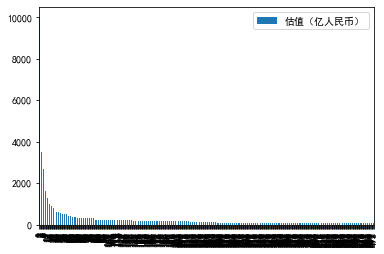

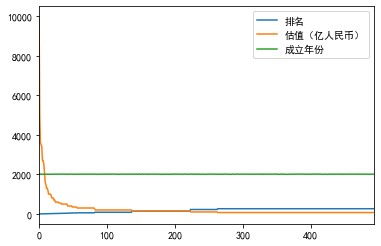

In [163]:
df[["估值（亿人民币）"]].plot(kind="bar")
# kind : str#绘图类型
# bar : vertical bar plot#条形图。stacked为True时为堆叠的柱状图
df.plot()

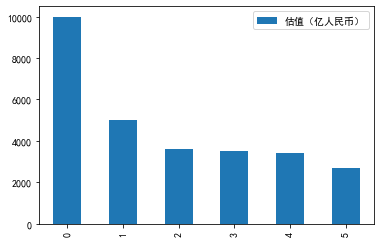

In [164]:
%matplotlib inline  
# 魔法命令，可以将matplotlib的图表直接嵌入到Notebook之中，inline表示将图表嵌入到Notebook中
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
mpl.rcParams['axes.unicode_minus']=False    #用来正常显示负号
df.loc[[0,1,2,3,4,5],["估值（亿人民币）"]].plot(kind="bar")

# 5. 如何从现有列创建派生新列
## 列列列
新派生列就是变数variables的转换
```
代码片语：
df['新变量'] = df['变量A'] + df['变量B']
df['新变量'] =[转换(x) for x in df['变量A']]
```

In [165]:
data['C'] = data['A'] + data['B']  
data

,A,B,C
0,A1,B1,A1B1
1,A2,B2,A2B2


In [166]:
data['D'] = [x for x in data['A']]
data

,A,B,C,D
0,A1,B1,A1B1,A1
1,A2,B2,A2B2,A2


# 6. 如何计算汇总描述性统计信息？
## 算算算

```
相关代码   
df.describe()
df.describe(include=all)   
   
df.count()
df.sum()   
   
df.min()
df.max()
df.mean()
df.median()

df.var()
df.std()
```

In [191]:
df.describe()
# 数据清理一般都会用到这个函数，还可以传参数
# 其物理意义在于观察这一系列数据的范围。大小、波动趋势等等，便于判断后续对数据采取哪类模型更合适。

,排名,估值（亿人民币）,成立年份
count,494.000000,494.000000,494.000000
mean,180.977733,238.805668,2011.234818
std,91.073191,623.158537,3.792477
min,1.000000,70.000000,2000.000000
25%,84.000000,70.000000,2009.000000
50%,224.000000,100.000000,2012.000000
75%,264.000000,200.000000,2014.000000
max,264.000000,10000.000000,2019.000000


In [190]:
df.describe(include="all")
# include="all" 是对所有属性的描述

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
count,494.000000,494,494,494.000000,494,494,494,494,494.000000,494
unique,NaN,494,494,NaN,24,120,25,485,NaN,489
top,NaN,柠萌影业,TripActions,NaN,中国,北京,电子商务,张勇,NaN,未透露
freq,NaN,1,1,NaN,206,81,68,3,NaN,3
mean,180.977733,NaN,NaN,238.805668,NaN,NaN,NaN,NaN,2011.234818,NaN
std,91.073191,NaN,NaN,623.158537,NaN,NaN,NaN,NaN,3.792477,NaN
min,1.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,2000.000000,NaN
25%,84.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,2009.000000,NaN
50%,224.000000,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,2012.000000,NaN
75%,264.000000,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,2014.000000,NaN


In [173]:
df.count()
# 非空元素计算

排名              494
企业名称            494
Company Name    494
估值（亿人民币）        494
国家              494
城市              494
行业              494
掌门人/创始人         494
成立年份            494
部分投资机构          494
dtype: int64

In [174]:
df.sum()
# 求和

排名                                                          89403
企业名称            蚂蚁金服字节跳动滴滴出行InforJUUL Labs爱彼迎陆金所SpaceXWeWorkSt...
Company Name    Ant FinancialBytedanceDidi ChuxingInforJUUL La...
估值（亿人民币）                                                   117970
国家              中国中国中国美国美国美国中国美国美国美国中国中国中国中国中国新加坡美国美国美国中国中国美国印...
城市              杭州北京北京纽约旧金山旧金山上海洛杉矶纽约旧金山深圳杭州北京北京深圳新加坡洛杉矶帕洛阿尔托旧...
行业              金融科技媒体和娱乐共享经济云计算消费品共享经济金融科技航天共享经济金融科技金融科技物流金融科...
掌门人/创始人         井贤栋张一鸣程维Jim SchaperAdam Bowen, James Monsees, ...
成立年份                                                       993550
部分投资机构          春华资本、中投海外、红杉资本红杉资本、海纳亚洲、纪源资本、启明创投腾讯、阿里巴巴、红杉资本、...
dtype: object

In [175]:
data.sum()

A        A1A2
B        B1B2
C    A1B1A2B2
D        A1A2
dtype: object

In [176]:
df.min()
# 最小值

排名                         1
企业名称            10X Genomics
Company Name       100credit
估值（亿人民币）                  70
国家                        中国
城市                         -
行业                      3D印刷
掌门人/创始人                    -
成立年份                    2000
部分投资机构                     -
dtype: object

In [177]:
df.max()
# 最大值

排名                        264
企业名称                   麦奇教育科技
Company Name           yMatou
估值（亿人民币）                10000
国家                        马耳他
城市                        马德里
行业                       金融科技
掌门人/创始人                   龙沛智
成立年份                     2019
部分投资机构          鼎晖投资、IDG、中金公司
dtype: object

In [178]:
df.mean()
# 均值

排名           180.977733
估值（亿人民币）     238.805668
成立年份        2011.234818
dtype: float64

In [179]:
df.median()
# 中位数

排名           224.0
估值（亿人民币）     100.0
成立年份        2012.0
dtype: float64

In [182]:
data.max()

A      A2
B      B2
C    A2B2
D      A2
dtype: object

In [183]:
data.min()

A      A1
B      B1
C    A1B1
D      A1
dtype: object

In [184]:
df.var()
# 方差

排名            8294.326075
估值（亿人民币）    388326.562564
成立年份            14.382883
dtype: float64

In [186]:
df.std()
# 标准差

排名           91.073191
估值（亿人民币）    623.158537
成立年份          3.792477
dtype: float64

# [本周总结以及github仓库链接](https://github.com/Kkrosslw/Python_data_analysis/tree/master/week_02)